# 第二章 基础二维图
## 并列/层叠柱状图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
import matplotlib.pyplot as plt

## 并列

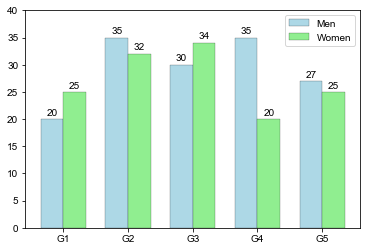

In [18]:
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        x=rect.get_x()+rect.get_width()/2
        ax.text(x, height*1.01, str(height), ha='center',va='bottom')
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35

fig=plt.figure()
ax=plt.gca()
x=np.arange(0,len(labels))
bar_men=ax.bar(x-width/2,men_means,color='lightblue', width=width, ec='k', lw=0.2, label='Men')
bar_women=ax.bar(x+width/2,women_means,color='lightgreen', width=width, ec='k', lw=0.2, label='Women')
autolabel(bar_men)
autolabel(bar_women)
ax.legend()
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(labels)
ax.set_ylim(0,40)
plt.show()

## 层叠

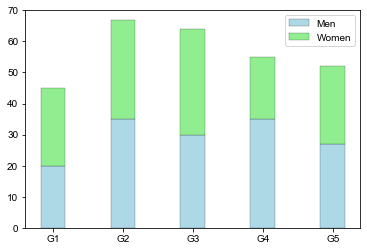

In [22]:
fig=plt.figure()
ax=plt.gca()
x=np.arange(0,len(labels))
bar_men=ax.bar(x,men_means,color='lightblue', width=width, ec='k', lw=0.2, label='Men')
bar_women=ax.bar(x,women_means,color='lightgreen', width=width, ec='k', lw=0.2, label='Women', bottom=men_means)

ax.legend()
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(labels)
ax.set_ylim(0,70)
plt.show()

## Error bar

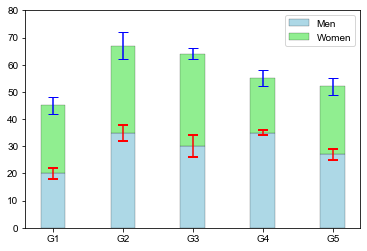

In [28]:
fig=plt.figure()
ax=plt.gca()
x=np.arange(0,len(labels))
error_kw={'capsize': 5, 'capthick': 2, 'ecolor': 'r'}
bar_men=ax.bar(x,men_means,color='lightblue', width=width, ec='k', lw=0.2, label='Men', yerr=men_std, error_kw=error_kw)
bar_women=ax.bar(x,women_means,color='lightgreen', width=width, ec='k', lw=0.2, label='Women', bottom=men_means, yerr=women_std, capsize=5, ecolor='b')

ax.legend()
ax.xaxis.set_ticks(x)
ax.xaxis.set_ticklabels(labels)
ax.set_ylim(0,80)
plt.show()

## 水平层叠

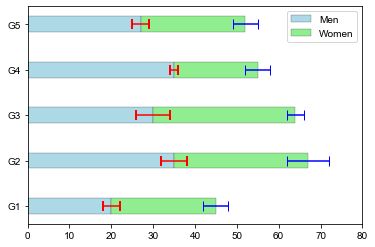

In [40]:
fig=plt.figure()
ax=plt.gca()
x=np.arange(0,len(labels))
error_kw={'capsize': 5, 'capthick': 2, 'ecolor': 'r'}
bar_men=ax.barh(x,men_means,color='lightblue', height=width, ec='k', lw=0.2, label='Men', xerr=men_std, error_kw=error_kw)
bar_women=ax.barh(x,women_means,color='lightgreen', height=width, ec='k', lw=0.2, label='Women', left=men_means, xerr=women_std, capsize=5, ecolor='b')

ax.legend()
ax.yaxis.set_ticks(x)
ax.yaxis.set_ticklabels(labels)
ax.set_xlim(0,80)
plt.show()

## 离散分布图

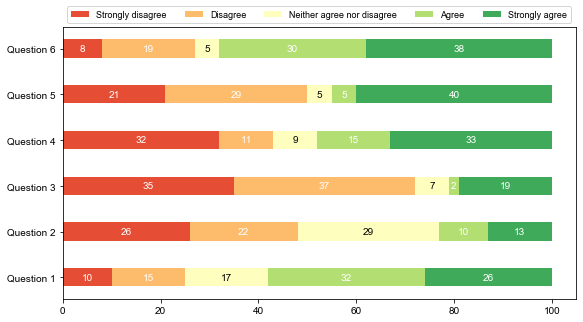

In [66]:
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}
height=0.4
fig=plt.figure(figsize=(9.2, 5))
ax=plt.gca()
labels=list(results.keys())
data=np.array(list(results.values()))
data_cum=data.cumsum(axis=1)
category_colors=plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

for i in range(0, data.shape[1]):
    starts=data_cum[:,i]-data[:,i]
    widths=data[:,i]
    ax.barh(labels,widths, left=starts, height=height, color=category_colors[i], label=category_names[i])
    xcenters=starts+widths/2
    r, g, b, _ =category_colors[i]
    text_color='white' if r*g*b<0.5 else 'k'
    for y, (x,c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha='center', va='center', color=text_color)
ax.legend(loc='lower left', ncol=len(category_names), bbox_to_anchor=(0,1), fontsize=9)
plt.show()

## 案例2

In [67]:
datafile='data/Susanne_Nature_2020/Figure3b.xlsx'
labels=['NEBD to metaphase',
        'Metaphase',
        'Anaphase to cytokinesis',
        'Mitotic arrest',
        'Death in mitosis',
        'Mitotic slippage']
colors=[(88/255, 129/255, 184/255),
        (247/255, 193/255, 67/255),
        (159/255, 205/255, 99/255),
        (236/255, 51/255, 35/255),
        'k',
        (11/255, 251/255, 253/255)]
titles=['siPTTG1', 'siSGO2', 'siSGO2/PTTG1', 
        'siSGO2/PTTG1/MCL1', 'siSGO2/PTTG1/MCL1\n+ transgen. His6-MCL1-WT',
        'siSGO2/PTTG1/MCL1\n+ transgen. His6-MCL1-TEV']
keys=['A','B','C','D','E','F']

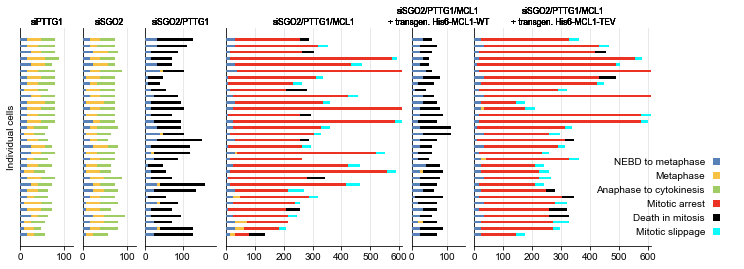

In [91]:
fig, axs=plt.subplots(1, 6, sharex=False, sharey=True, 
                     gridspec_kw={'width_ratios':[0.3, 0.3, 0.4, 1, 0.3, 1],'height_ratios':[1]},
                    figsize=(12,4))
barwidth=0.4

for i in range(0,6):
    data=pd.read_excel(datafile, sheet_name='Sheet'+str('%.0f'% (i+1)))
    data=data.fillna(0)
    data_values=data.values
    data_cum=data_values.cumsum(axis=1)
    ax=axs[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks([])
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.grid(axis='x', which='major', color='lightgray', linewidth=0.5, zorder=1)
    for j in range(0, len(keys)):
        starts=data_cum[:,j]-data_values[:,j]
        values=data[keys[j]].values
        label=None
        if(i==5):
            label=labels[j]
        ax.barh(np.arange(0,len(values)), data_values[:,j], left=starts, height=barwidth, color=colors[j], label=label, zorder=5)
        ax.text(0.5, 1.01, titles[i], transform=ax.transAxes, ha='center', va='bottom', fontsize='small')
legend=ax.legend(markerfirst=False, frameon=False, loc='lower left', bbox_to_anchor=(0.64, 0))
for legend_handle in legend.legendHandles:
    legend_handle.set_width(legend_handle.get_height())
axs[0].set_xlim(0,120)
axs[1].set_xlim(0,120)
axs[2].set_xlim(0,190)
axs[3].set_xlim(0,610)
axs[4].set_xlim(0,150)
axs[5].set_xlim(0,610)
axs[0].set_ylabel('Individual cells')

plt.subplots_adjust(wspace=0.1, left=0.2, right=0.93)

plt.show()